In [1]:
import pandas as pd
import numpy as np
#Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import random
#Hyper Parameter tunning
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.model_selection import RandomizedSearchCV
#Data Transformation
from sklearn.preprocessing import StandardScaler,RobustScaler
#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train = pd.read_csv("E:\Machine Learning\data sets\Kaggle\Train.csv")
df_test = pd.read_csv("E:\Machine Learning\data sets\Kaggle\Test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### PassengerId is the unique id of the row and it doesn't have any effect on target

### Survived is the target variable we are trying to predict (0 or 1):
-          1 = Survived
-          0 = Not Survived

### Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
-           1 - Upper Class
-           2 - Middle Class
-           3 - Lower Class

### Name, Sex and Age are self-Details

### SibSp is the total number of the passengers - Sibling & Spouse
-           Sibling = brother, sister, stepbrother, stepsister
-           Spouse = husband, wife (mistresses and fiancés were ignored)

### Parch is the total number of the passengers - parents and children
-           Parent - mother, father
-           Child - daughter, son, stepdaughter, stepson

### Ticket is the ticket number of the passenger

### Fare is the passenger fare

### Cabin is the cabin number of the passenger

### Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
-             C - Cherbourg
-             Q - Queenstown
-             S - Southampton

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age & Cabin & Embarked Feature has some null values.

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age & Cabin & Fare Feature has some null values.

In [7]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
df_train = df_train.iloc[:,1:]   #Drop PassengerId column
passenger = df_test.iloc[:,0]
df_test = df_test.iloc[:,1:]
passenger

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [9]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


## Check Dataset is Balanced or Imbalanced

In [11]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df_train["Survived"].value_counts()/df_train["Survived"].value_counts().sum()

0    0.616162
1    0.383838
Name: Survived, dtype: float64

61% of people Not survived.

39% of people survived.
### Dataset is Balanced.

In [13]:
print(f"Training dataset shape : {df_train.shape}")
print(f"Testing dataset shape : {df_test.shape}")

Training dataset shape : (891, 11)
Testing dataset shape : (418, 10)


## Visualizing the missing values

Text(0.5, 1.0, 'Train Dataset')

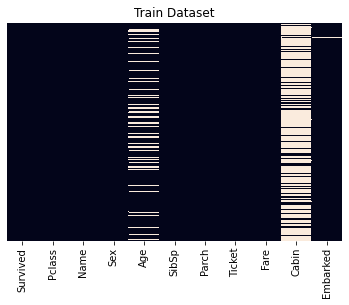

In [14]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)
plt.title("Train Dataset")

Text(0.5, 1.0, 'Test Dataset')

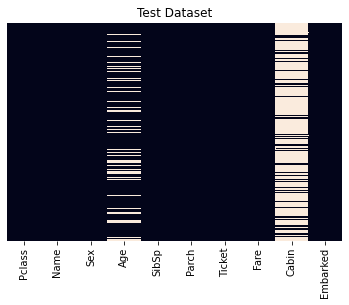

In [15]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)
plt.title("Test Dataset")

## Exploratry of the data

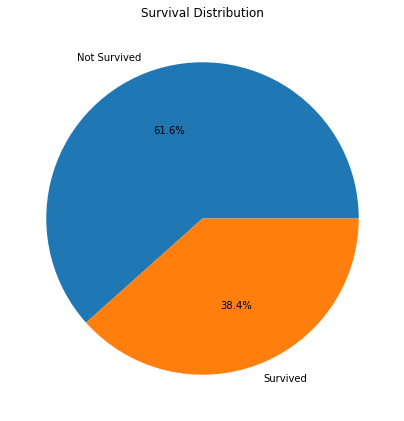

In [16]:
plt.figure(figsize=(7,8))
slices = df_train["Survived"].value_counts()/df_train["Survived"].value_counts().sum()
plt.pie(slices,labels=["Not Survived","Survived"],autopct="%1.1f%%")
plt.title("Survival Distribution")
plt.show()

In [17]:
Categorical_feature = [i for i in df_train.columns if len(df_train[i].unique()) < 10]
Categorical_feature

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

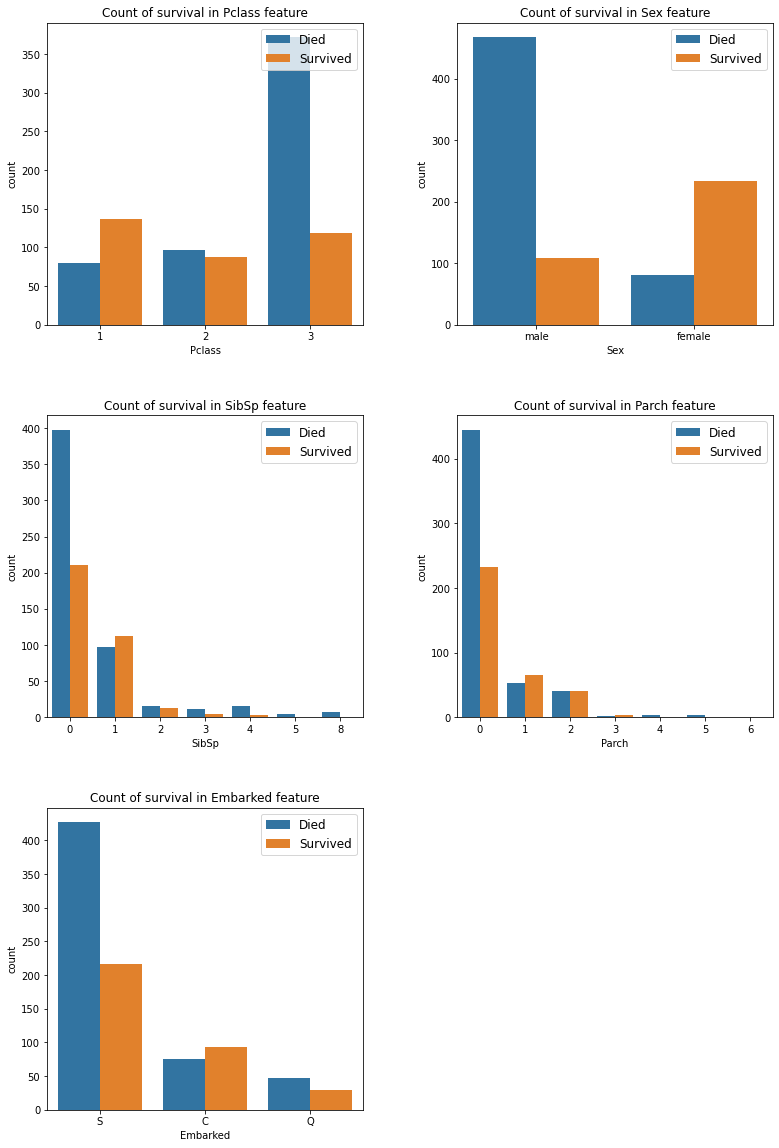

In [18]:
plt.subplots(figsize = (13, 20))

for i,j in zip(Categorical_feature[1:],range(len(Categorical_feature[1:]))):
    plt.subplot(3,2,j+1)
    plt.subplots_adjust(wspace = 0.3,hspace = 0.3)
    sns.countplot(df_train[i],hue=df_train.Survived)
    plt.legend(["Died","Survived"],loc="upper right",fontsize=12)
    plt.title(f"Count of survival in {i} feature",fontsize=12)
   
plt.show()

-  In Pclass feature mostly 3rd class passengers are Died
-  In Sex feature Most likely Male die.
-  In Sibsp & Parch features Mostly ALone traveled person is died.
-  In Embarked feature Mostly Southampton embarked peoples are died,we need to explore that why.

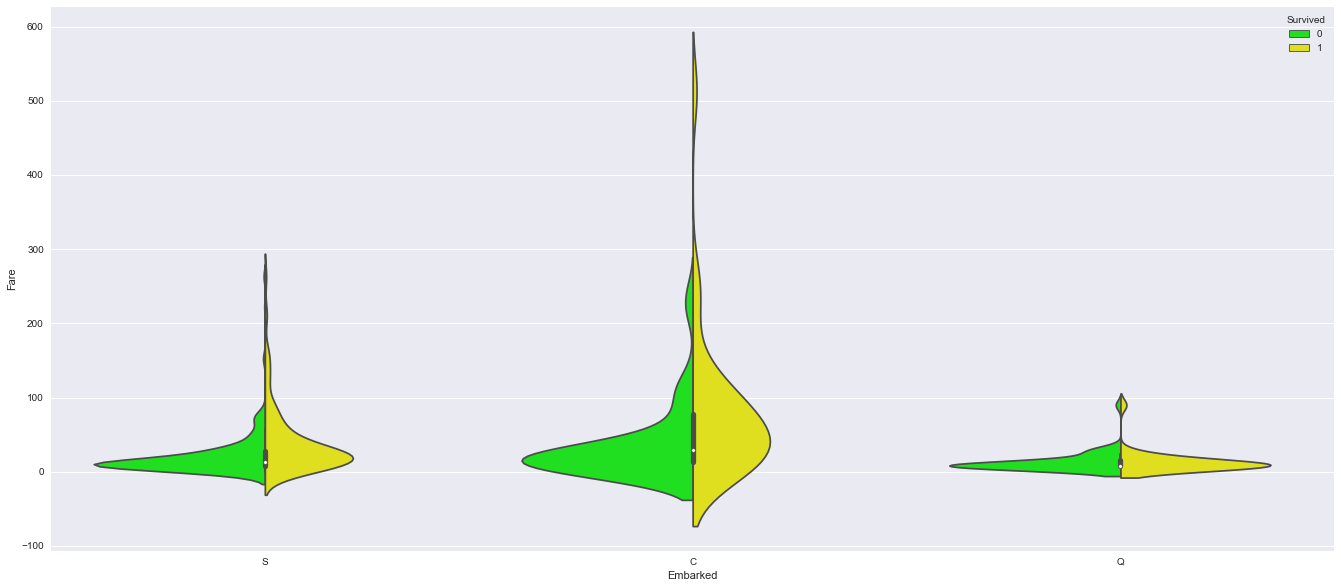

In [19]:
plt.figure(figsize=(23,10))
plt.style.use("seaborn")
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df_train, split=True, palette={0: "lime", 1: "yellow"})

We can see Emabarked in C people are paying high fare may be those are are traveled in Pclass 1,who paid mor fare those are survived.

In [20]:
df_train.Ticket.dtype

dtype('O')

In [21]:
Numerical_feature = [i for i in df_train.columns if len(df_train[i].unique()) > 10 and df_train[i].dtype != "O"]
Numerical_feature

['Age', 'Fare']

Age feature skewness : 0.389
Fare feature skewness : 4.787


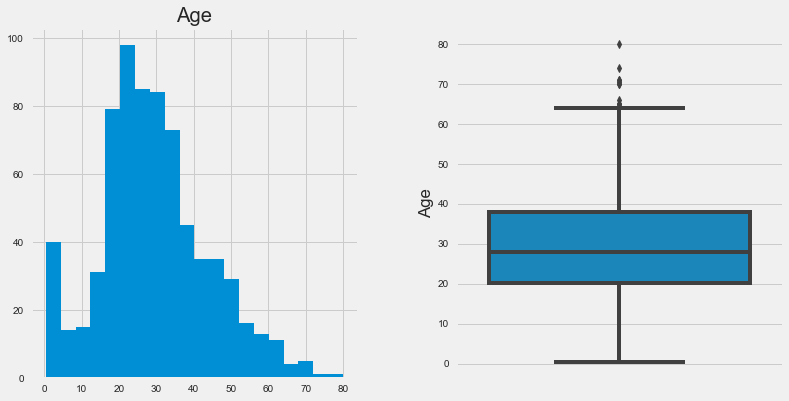

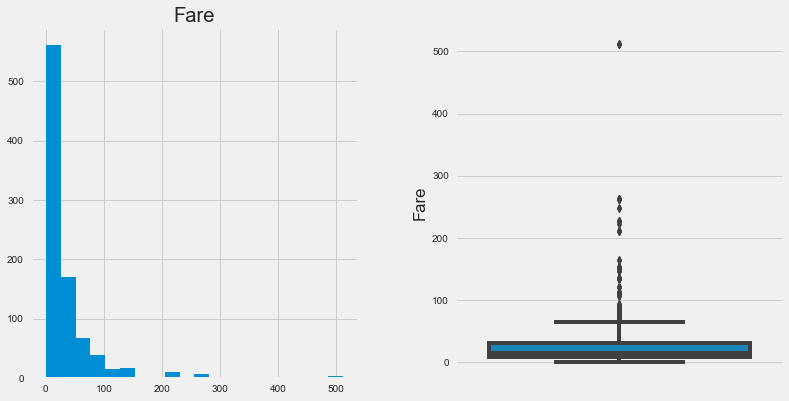

In [22]:
plt.style.use("fivethirtyeight")

for i in Numerical_feature:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    df_train[i].hist(bins=20)
    plt.subplots_adjust(wspace = 0.3,hspace = 0.3)
    plt.title(i)
    plt.subplot(1,2,2)
    sns.boxplot(y=df_train[i])
    
    
for i in Numerical_feature:
    print(f"{i} feature skewness : {np.round(df_train[i].skew(),3)}")

Age & Fare features has some outliers.


Fare feature is right skewed.

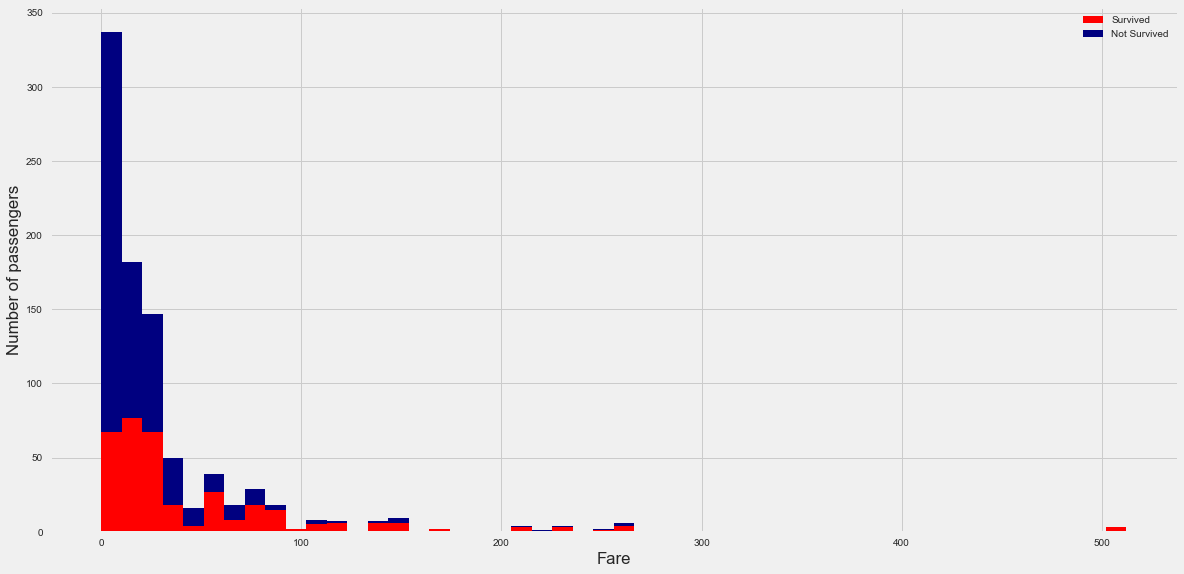

In [23]:
figure = plt.figure(figsize=(18, 9))
plt.hist([df_train[df_train['Survived'] == 1]['Fare'], df_train[df_train['Survived'] == 0]['Fare']], 
         stacked=True, color = ["red","navy"],
         bins = 50, label = ['Survived','Not Survived'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Mostly less fare paid people's died.

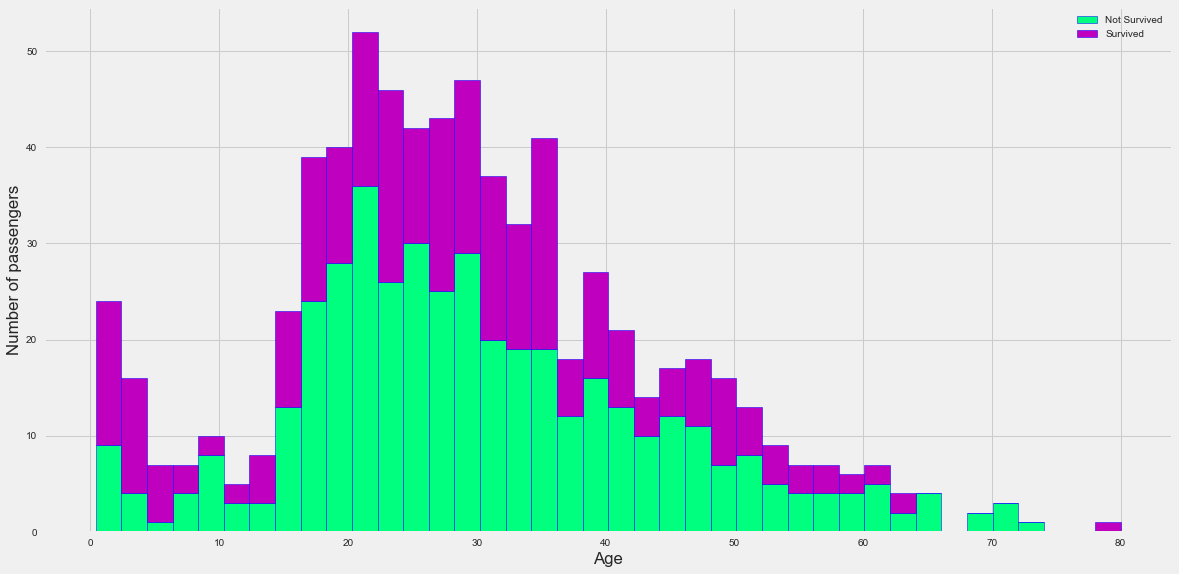

In [24]:
figure = plt.figure(figsize=(18, 9))
plt.hist([df_train[df_train['Survived'] == 0]["Age"], df_train[df_train['Survived'] == 1]["Age"]], stacked=True,color = ["springgreen","m"],
         bins = 40,edgecolor="b", label = ['Not Survived','Survived'])
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.ylabel('Number of passengers')
plt.legend()

Text(0.5, 1.0, 'Distribution of Fare & Age based on Survival')

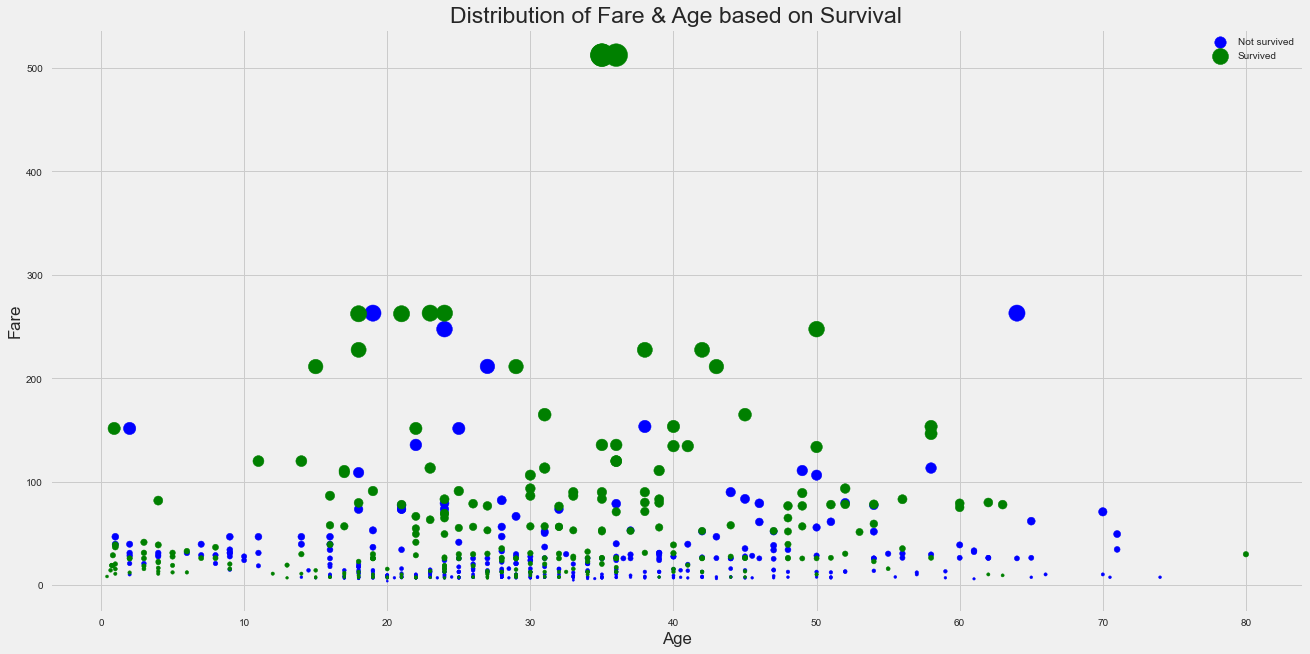

In [25]:
plt.figure(figsize=(20,10))
plt.scatter(df_train[df_train["Survived"]==0]["Age"],df_train[df_train["Survived"]==0]["Fare"],c="b",s=df_train[df_train["Survived"]==0]["Fare"],label="Not survived")
plt.scatter(df_train[df_train["Survived"]==1]["Age"],df_train[df_train["Survived"]==1]["Fare"],c="g",s=df_train[df_train["Survived"]==1]["Fare"],label="Survived")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Distribution of Fare & Age based on Survival",fontsize=23)

Above Plot tells who paid more than 90 dollers,those peoples mostly survived.

## Details From Exploratory of data analysis:

-        3rd Pclass passengers & Male Passengers are mostly died & Male Passengers.
-        solo travelled passengers mostly died.
-        less fare paid peoples are not survived mostly.
-        Age & Fare feature has some outliers we need to handle that by feature Engineering.
-        some feature has Missing values we need handle that.
-        Cabin & Name & ticket features has more than 20 unique values but those are categorical feature we need to group that.

## Feature Engineering

Before section we analys the dataset.In this part we transform & combaining two feature create one feature.feature engineering helps to features are relavent to the model & improve the accuracy of the model.


if we transform any features we need to perform that task both train and test set.

### Data transformation

### Name Feature

In [26]:
df_train.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

- We can see every name has honorific mention like Mr,Mrs,Miss,Master,Dona.By this we can replace the title with some commom title.Lets Do grouping.

- Name Feature didn't have any Null values.

In [27]:
name_uni = set()
for i in df_train.Name:
    name_uni.add(i.split(',')[1].split(".")[0])
for i in df_test.Name:
    name_uni.add(i.split(',')[1].split(".")[0])
    
name_uni

{' Capt',
 ' Col',
 ' Don',
 ' Dona',
 ' Dr',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Master',
 ' Miss',
 ' Mlle',
 ' Mme',
 ' Mr',
 ' Mrs',
 ' Ms',
 ' Rev',
 ' Sir',
 ' the Countess'}

In [28]:
title_dict ={
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona" : "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Mrs",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Mrs",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [29]:
df_train["title"] = df_train["Name"].apply(lambda x : x.split(',')[1].split(".")[0].strip())
df_test["title"] = df_test["Name"].apply(lambda x : x.split(',')[1].split(".")[0].strip())

In [30]:
df_train["title"] = df_train["title"].map(title_dict)
df_test["title"] = df_test["title"].map(title_dict)

In [31]:
print(df_train["title"].unique())
print(df_test["title"].unique())

['Mr' 'Mrs' 'Master' 'Royalty' 'Officer']
['Mr' 'Mrs' 'Master' 'Officer' 'Royalty']


Text(0.5, 0, 'Titles')

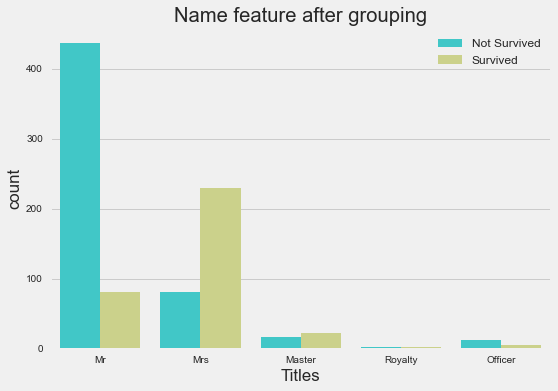

In [32]:
sns.countplot(df_train["title"],hue=df_train["Survived"],palette="rainbow")
plt.legend(["Not Survived","Survived"],loc="upper right",fontsize=12)
plt.title("Name feature after grouping")
plt.xlabel("Titles")

### Cabin feature

In [33]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- Cabin feature define passengers staying room section & room number.

- Cabin feature also contains 687 Missing values.we need to find that too.i dont think it is possible to find the room numbers for missing values.

- This Feature missing values are in type of Missing not at random so we can not fill with most frequent value.in this point im going to use Adding variable to capture NAN values technique.

In [34]:
df_train["Cabin"].fillna("M",inplace = True) #assign New Variable to capture the missing value
df_test["Cabin"].fillna("M",inplace = True)

df_train["Cabin"] = df_train["Cabin"].apply(lambda x: x[0]) #getting first letter from Cabin feature thats denotes cabin section.
df_test["Cabin"] = df_test["Cabin"].apply(lambda x: x[0])

In [35]:
print(f"Training data Cabin : {df_train.Cabin.unique()}")
print(f"Testing data Cabin : {df_test.Cabin.unique()}")

Training data Cabin : ['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
Testing data Cabin : ['M' 'B' 'E' 'A' 'C' 'D' 'F' 'G']


In [36]:
print(f"Missing values Training Cabin feature : {df_test.Cabin.isna().sum()}")
print(f"Missing values Testing Cabin feature : {df_test.Cabin.isna().sum()}")

Missing values Training Cabin feature : 0
Missing values Testing Cabin feature : 0


Text(0.5, 0, 'Cabin')

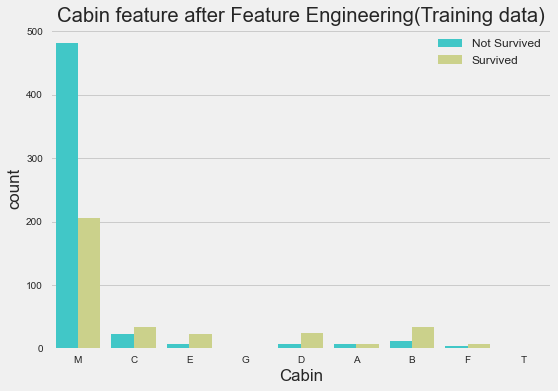

In [37]:
sns.countplot(df_train["Cabin"],hue=df_train["Survived"],palette="rainbow")
plt.legend(["Not Survived","Survived"],loc="upper right",fontsize=12)
plt.title("Cabin feature after Feature Engineering(Training data)")
plt.xlabel("Cabin")

Text(0.5, 0, 'Cabin')

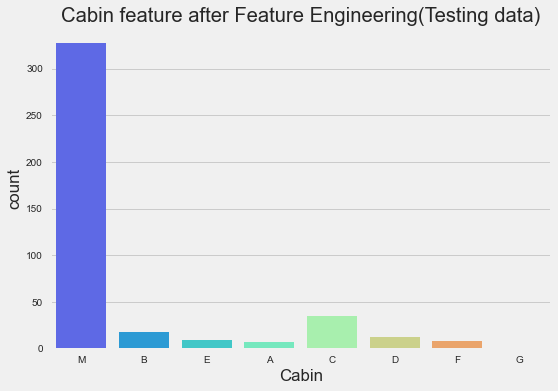

In [38]:
sns.countplot(df_test["Cabin"],palette="rainbow")
plt.title("Cabin feature after Feature Engineering(Testing data)")
plt.xlabel("Cabin")

Presence of G & T values very low so we can map into most repeated value.

In [39]:
cabin_dict = {"T" : "C",
               "G" : "C"}
df_train["Cabin"] = df_train.Cabin.replace(cabin_dict)
df_test["Cabin"] = df_test.Cabin.replace(cabin_dict)

## Ticket Feature

In [40]:
df_train["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

- Ticket feature did not have any null values.
- Ticket feature contains ticket number & some tickets has strings thats may be deck section.we need to group tickets to make more relevent to models,that will helps to get better accuracy.

In [41]:
df_train["Ticket"] = df_train["Ticket"].apply(lambda x: x.strip())
df_test["Ticket"] = df_test["Ticket"].apply(lambda x: x.strip())

In [42]:
df_train["Ticket"] = df_train["Ticket"].apply(lambda x: x[0])  #separate the first letter from the ticket
df_test["Ticket"] = df_test["Ticket"].apply(lambda x: x[0])
df_train["Ticket"].value_counts()  #some integer values are present,group that into commom ticket value ex."x"

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64

In [43]:
ticket_dict = {'3': "X",
 '2': "X",
 '1': "X",
 'P': "P",
 'S': "S",
 'C': "C",
 'A': "A",
 'W': "W",
 '4': "X",
 '7': "X",
 'F': "F",
 '6': "X",
 'L': "L",
 '5': "X",
 '8': "X",
 '9': "X"}

In [44]:
df_train["Ticket"] = df_train["Ticket"].map(ticket_dict)
df_test["Ticket"] = df_test["Ticket"].map(ticket_dict)

In [45]:
df_train["Ticket"].value_counts()

X    661
S     65
P     65
C     47
A     29
W     13
F      7
L      4
Name: Ticket, dtype: int64

In [46]:
df_train["Ticket"] = df_train["Ticket"].replace({"L":"S","F":"P"})

In [47]:
df_test["Ticket"].value_counts()

X    296
S     33
P     33
C     30
A     13
F      6
W      6
L      1
Name: Ticket, dtype: int64

In [48]:
df_test["Ticket"] = df_test["Ticket"].replace({"L":"S","F":"P"})

Presence of L & F Values is too low so we can replace that by most repeated value.

Text(0.5, 0, 'Ticket')

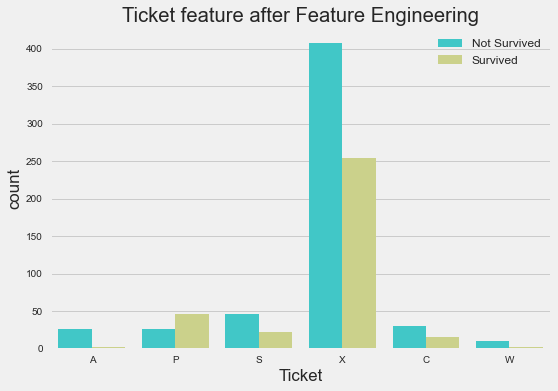

In [49]:
sns.countplot(df_train["Ticket"],hue=df_train["Survived"],palette="rainbow")
plt.legend(["Not Survived","Survived"],loc="upper right",fontsize=12)
plt.title("Ticket feature after Feature Engineering")
plt.xlabel("Ticket")

## Embarked feature

- Embarked feature has 2 null values,we can fill that with most frequent value.

In [50]:
embarked_mfv = df_train["Embarked"].mode()[0]
embarked_mfv

'S'

In [51]:
df_train["Embarked"].fillna(embarked_mfv,inplace=True)

In [52]:
print(f"Number of Missing values in Embarked feature : {df_train.Embarked.isna().sum()}")

Number of Missing values in Embarked feature : 0


## Parch & SibSp Features:

- In exploratory of data,we can see group of people(family) survival rate is higher compared to alone travelled passenger.
- I gonna create new feature by adding Parch&sibsp.

In [53]:
df_train["Family_size"] = df_train["Parch"] + df_train["SibSp"] + 1 #adding one for travelling alone passenger

df_test["Family_size"] = df_test["Parch"] + df_test["SibSp"] + 1


- we need to give impotance to Family size,below process separate feature with size of the family

In [54]:
df_train["single"] = df_train["Family_size"].apply(lambda x: 1 if x==1 else 0)
df_train["small_family"] = df_train["Family_size"].apply(lambda x: 1 if 4 >= x >= 2 else 0)
df_train["large_family"] = df_train["Family_size"].apply(lambda x: 1 if 5 <= x else 0)

In [55]:
df_test["single"] = df_test["Family_size"].apply(lambda x: 1 if x==1 else 0)
df_test["small_family"] = df_test["Family_size"].apply(lambda x: 1 if 4 >= x >= 2 else 0)
df_test["large_family"] = df_test["Family_size"].apply(lambda x: 1 if 5 <= x else 0)

Text(0.5, 0, 'Family_size')

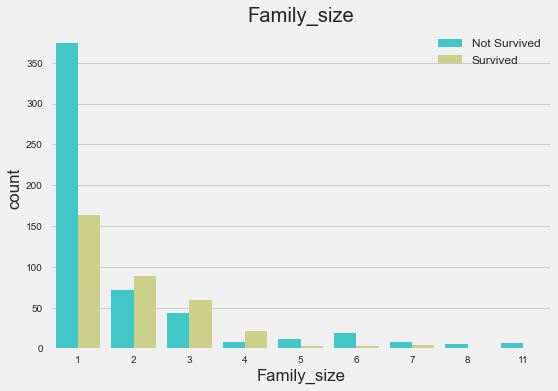

In [56]:
sns.countplot(df_train["Family_size"],hue=df_train["Survived"],palette="rainbow")
plt.legend(["Not Survived","Survived"],loc="upper right",fontsize=12)
plt.title("Family_size")
plt.xlabel("Family_size")

## Fare feature

In [57]:
print(f"Number of Missing values in Training Fare feature : {df_train.Fare.isna().sum()}")
print(f"Number of Missing values in Test Fare feature : {df_test.Fare.isna().sum()}")

Number of Missing values in Training Fare feature : 0
Number of Missing values in Test Fare feature : 1


- In Fare feature testing data set 1 missing value is present.
- Fare feature also have some outliesrs.

In [58]:
df_train["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [59]:
print(f"Mean value for fare : {df_test.Fare.mean()}")
print(f"Median value for fare : {df_test.Fare.median()}")

Mean value for fare : 35.6271884892086
Median value for fare : 14.4542


In [60]:
df_test[df_test.Fare.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Family_size,single,small_family,large_family
152,3,"Storey, Mr. Thomas",male,60.5,0,0,X,NaN,M,S,Mr,1,1,0,0


Text(0, 0.5, 'Fare')

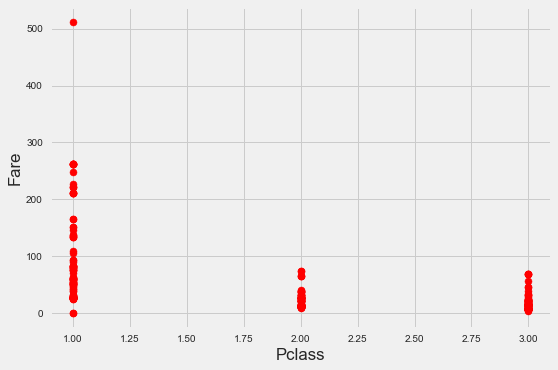

In [61]:
plt.scatter(df_test.Pclass,df_test.Fare,c="r")
plt.xlabel("Pclass")
plt.ylabel("Fare")

In [62]:
df_test.groupby(df_test["Pclass"])["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [63]:
df_test["Fare"].fillna(12.4596,inplace=True)

- Scatter plot says fare increasing rate is depends on the Pclass.so,we can fill the Null value with fare mean value from the Pclass-3 

- In Data analysis we see low fare payed peoples are mostly died.so,we need to give more importance to the fare feature.

In [64]:
print(df_train.Fare.describe())
print(f"Median : {df_train.Fare.median()}")

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Median : 14.4542


In [65]:
df_train["low_fare"] = df_train["Fare"].apply(lambda x: 1 if x < 8 else 0)
df_train["median_fare"] = df_train["Fare"].apply(lambda x: 1 if 8 < x < 14.46 else 0)
df_train["Average_fare"] = df_train["Fare"].apply(lambda x: 1 if 14.46 < x < 32 else 0)
df_train["high_fare"] = df_train["Fare"].apply(lambda x: 1 if 32 < x < 513 else 0)

In [66]:
print(df_test.Fare.describe())
print(f"Median : {df_test.Fare.median()}")

count    418.000000
mean      35.571764
std       55.851997
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64
Median : 14.4542


In [67]:
df_test["low_fare"] = df_test["Fare"].apply(lambda x: 1 if x < 8 else 0)
df_test["median_fare"] = df_test["Fare"].apply(lambda x: 1 if 8 < x < 14.46 else 0)
df_test["Average_fare"] = df_test["Fare"].apply(lambda x: 1 if 14.46 < x < 36 else 0)
df_test["high_fare"] = df_test["Fare"].apply(lambda x: 1 if 36 < x < 513 else 0)

## Age Feature

In [68]:
print(f"Number of Missing values in Training Age feature : {df_train.Age.isna().sum()}")
print(f"Number of Missing values in Test Age feature : {df_test.Age.isna().sum()}")

Number of Missing values in Training Age feature : 177
Number of Missing values in Test Age feature : 86


- Age feature has many Missing values,we need to check which features are related with Age feature by that we can fill the missin values.

In [69]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'title', 'Family_size', 'single',
       'small_family', 'large_family', 'low_fare', 'median_fare',
       'Average_fare', 'high_fare'],
      dtype='object')

In [70]:
Age_com = ["Pclass","Sex","Ticket","Embarked","title","Family_size"]

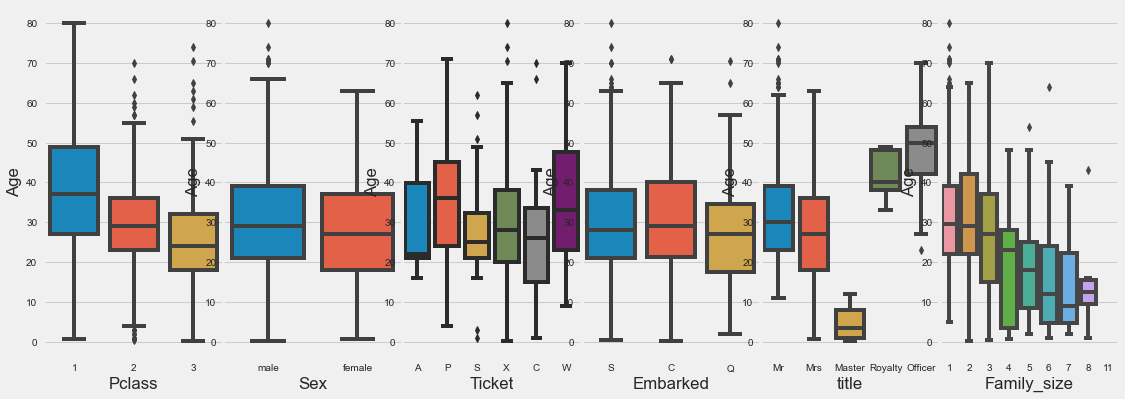

In [71]:
plt.figure(figsize=(20,6))

for j,i in enumerate(Age_com):
    plt.subplot(1,7,j+1)
    plt.subplots_adjust(wspace =0.002,hspace = 5)
    sns.boxplot(df_train[i],df_train['Age'])
    
   

- Above plot says Pclass,sex,title features are related with the Age feature. Filling the missing values with Random forest regressor.


In [72]:
Age_miss = df_train[['Sex','Pclass','title','Age']]
encode = pd.get_dummies(Age_miss[["Sex","title"]],prefix=["Sex","title"],drop_first=True)
Age_miss = Age_miss.merge(encode,left_on=None, right_on=None, left_index=True, right_index=True)
Age_miss.drop(["title",'Sex'],axis=1,inplace=True)
Age_tr_test = Age_miss[Age_miss.Age.isna()]
Age_tr_train = Age_miss[~Age_miss.Age.isna()]

In [73]:
Age_x_train = Age_tr_train.drop("Age",axis=1)
Age_y_train = Age_tr_train["Age"]
Age_x_test = Age_tr_test.drop("Age",axis=1)
Age_y_test = Age_tr_test["Age"]
from sklearn.ensemble import RandomForestRegressor
rfa = RandomForestRegressor(random_state=0,n_estimators=100)
rfa.fit(Age_x_train,Age_y_train)
Age_y_test = rfa.predict(Age_x_test)
Age_x_test["Age"] = Age_y_test
missing_train = Age_tr_train.append(Age_x_test).sort_index(axis=0)["Age"]

In [74]:
Age_miss = df_test[['Sex','Pclass','title','Age']]
encode = pd.get_dummies(Age_miss[["Sex","title"]],prefix=["Sex","title"],drop_first=True)
Age_miss = Age_miss.merge(encode,left_on=None, right_on=None, left_index=True, right_index=True)
Age_miss.drop(["title",'Sex'],axis=1,inplace=True)
Age_tr_test = Age_miss[Age_miss.Age.isna()]
Age_tr_train = Age_miss[~Age_miss.Age.isna()]

In [75]:
Age_x_train = Age_tr_train.drop("Age",axis=1)
Age_y_train = Age_tr_train["Age"]
Age_x_test = Age_tr_test.drop("Age",axis=1)
Age_y_test = Age_tr_test["Age"]
from sklearn.ensemble import RandomForestRegressor
rfa = RandomForestRegressor(random_state=0,n_estimators=100)
rfa.fit(Age_x_train,Age_y_train)
Age_y_test = rfa.predict(Age_x_test)
Age_x_test["Age"] = Age_y_test
missing_test = Age_tr_train.append(Age_x_test).sort_index(axis=0)["Age"]

In [76]:
df_train['Age'] = missing_train
df_test['Age'] = missing_test

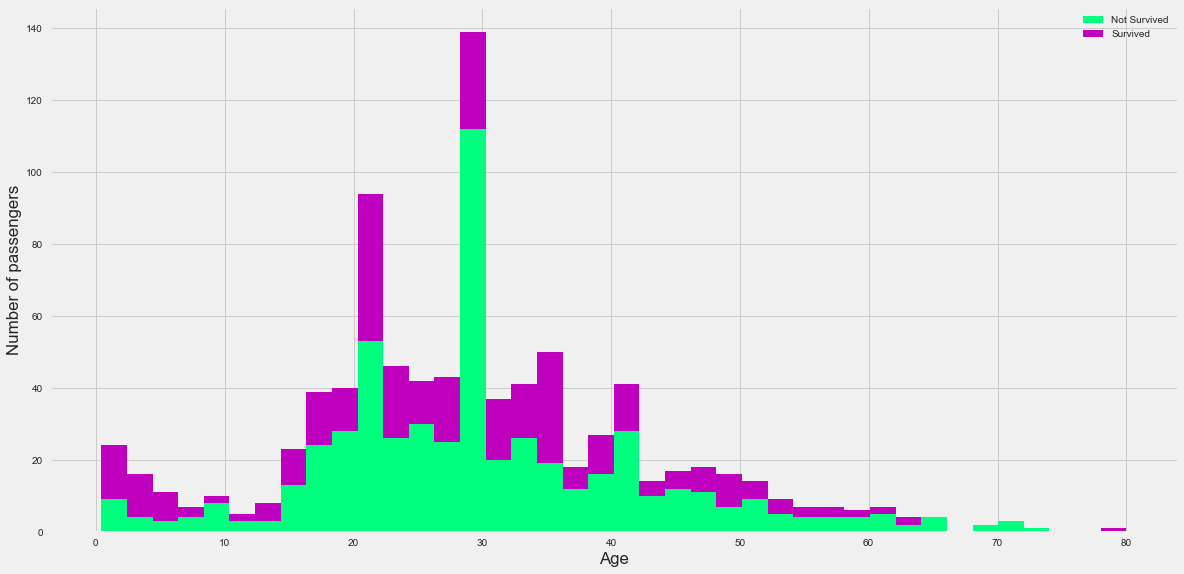

In [77]:
figure = plt.figure(figsize=(18, 9))
plt.hist([df_train[df_train['Survived'] == 0]["Age"], df_train[df_train['Survived'] == 1]["Age"]], stacked=True,color = ["springgreen","m"],
         bins = 40, label = ['Not Survived','Survived'])
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.ylabel('Number of passengers')
plt.legend()

In [78]:
df_train.Age.describe()

count    891.000000
mean      29.483859
std       13.375106
min        0.420000
25%       21.646914
50%       28.748260
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [79]:
df_train["Children"] = df_train["Age"].apply(lambda x: 1 if x < 13 else 0)
df_train["Teen"] = df_train["Age"].apply(lambda x: 1 if 13 < x < 20 else 0)
df_train["Adult"] = df_train["Age"].apply(lambda x: 1 if 20 < x < 40 else 0)
df_train["Older"] = df_train["Age"].apply(lambda x: 1 if 40 < x else 0)

In [80]:
df_test["Children"] = df_test["Age"].apply(lambda x: 1 if x < 13 else 0)
df_test["Teen"] = df_test["Age"].apply(lambda x: 1 if 13 < x < 20 else 0)
df_test["Adult"] = df_test["Age"].apply(lambda x: 1 if 20 < x < 40 else 0)
df_test["Older"] = df_test["Age"].apply(lambda x: 1 if 40 < x else 0)

In [81]:
print(f"Number of Missing values in Training Age feature : {df_train.Age.isna().sum()}")
print(f"Number of Missing values in Test Age feature : {df_test.Age.isna().sum()}")

Number of Missing values in Training Age feature : 0
Number of Missing values in Test Age feature : 0


- Now everything almost done in data cleaning & handling missing values,we need to encode the categorical value. 

In [82]:
df_train.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
title           0
Family_size     0
single          0
small_family    0
large_family    0
low_fare        0
median_fare     0
Average_fare    0
high_fare       0
Children        0
Teen            0
Adult           0
Older           0
dtype: int64

## Encoding 

In [83]:
Categorical_feature = [i for i in df_train.columns if len(df_train[i].unique()) < 10]
Categorical_feature

['Survived',
 'Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Ticket',
 'Cabin',
 'Embarked',
 'title',
 'Family_size',
 'single',
 'small_family',
 'large_family',
 'low_fare',
 'median_fare',
 'Average_fare',
 'high_fare',
 'Children',
 'Teen',
 'Adult',
 'Older']

In [84]:
df_train["Pclass"] =df_train["Pclass"].astype("str")
df_test["Pclass"] =df_test["Pclass"].astype("str")

In [85]:
train_encode = pd.get_dummies(df_train[['Sex','Ticket','Cabin','Embarked','title','Pclass']],
                              prefix=['Sex','Ticket','Cabin','Embarked','title','Pclass'])
train_encode.head()

,Sex_female,Sex_male,Ticket_A,Ticket_C,Ticket_P,Ticket_S,Ticket_W,Ticket_X,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,title_Master,title_Mr,title_Mrs,title_Officer,title_Royalty,Pclass_1,Pclass_2,Pclass_3
0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [86]:
test_encode = pd.get_dummies(df_test[["Pclass",'Sex','Ticket','Cabin','Embarked','title']],
                              prefix=["Pclass",'Sex','Ticket','Cabin','Embarked','title'])
test_encode.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_C,Ticket_P,Ticket_S,Ticket_W,...,Cabin_F,Cabin_M,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Mr,title_Mrs,title_Officer,title_Royalty
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [87]:
df_train = pd.merge(df_train,train_encode,how="outer",left_on=None,right_on=None,
                    left_index=True, right_index=True)

df_test = pd.merge(df_test,test_encode,how="outer",left_on=None,right_on=None,
                    left_index=True, right_index=True)


In [88]:
df_train.drop(columns=["Sex_female","Name","Sex","Pclass","Ticket","Cabin","Embarked","title"],inplace=True)
df_test.drop(columns=["Sex_female","Name","Sex","Pclass","Ticket","Cabin","Embarked","title"],inplace=True)

In [89]:
pd.set_option('display.max_columns',None)
df_train.head(5)

,Survived,Age,SibSp,Parch,Fare,Family_size,single,small_family,large_family,low_fare,median_fare,Average_fare,high_fare,Children,Teen,Adult,Older,Sex_male,Ticket_A,Ticket_C,Ticket_P,Ticket_S,Ticket_W,Ticket_X,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_M,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Mr,title_Mrs,title_Officer,title_Royalty,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,2,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1


## Feature selection

In [90]:
df_train.corr()

,Survived,Age,SibSp,Parch,Fare,Family_size,single,small_family,large_family,low_fare,median_fare,Average_fare,high_fare,Children,Teen,Adult,Older,Sex_male,Ticket_A,Ticket_C,Ticket_P,Ticket_S,Ticket_W,Ticket_X,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_M,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Mr,title_Mrs,title_Officer,title_Royalty,Pclass_1,Pclass_2,Pclass_3
Survived,1.000000,-0.081216,-0.035322,0.081629,0.257307,0.016639,-0.203367,0.279855,-0.125147,-0.210437,-0.110139,0.082887,0.244339,0.117636,0.009835,-0.042817,-0.033030,-0.543351,-0.118757,-0.021066,0.155499,-0.038723,-0.057546,0.001492,0.022287,0.175095,0.111137,0.150716,0.145321,0.057935,-0.316912,0.168240,0.003650,-0.149683,0.085221,-0.549199,0.535602,-0.031316,0.033391,0.285904,0.093349,-0.322308
Age,-0.081216,1.000000,-0.270760,-0.194692,0.110398,-0.282320,0.202674,-0.087648,-0.228088,-0.062737,-0.027922,-0.052168,0.147084,-0.551615,-0.310986,-0.090467,0.746880,0.122448,-0.003332,-0.074178,0.144234,-0.035632,0.030635,-0.037217,0.144115,0.098870,0.122323,0.139155,0.118697,-0.079400,-0.264356,0.036809,-0.071235,0.012582,-0.402796,0.230820,-0.130037,0.187582,0.068089,0.379364,0.020224,-0.343321
SibSp,-0.035322,-0.270760,1.000000,0.414838,0.159651,0.890712,-0.584471,0.213225,0.730691,-0.238520,-0.205020,0.187812,0.260246,0.385491,0.017853,-0.124259,-0.107143,-0.114631,-0.052608,0.320802,-0.043554,-0.068911,0.027185,-0.080768,-0.046266,-0.034538,0.025744,-0.017575,-0.036865,0.001706,0.040460,-0.059528,-0.026354,0.068734,0.349559,-0.250489,0.116100,-0.024712,-0.008384,-0.054582,-0.055932,0.092548
Parch,0.081629,-0.194692,0.414838,1.000000,0.216225,0.783111,-0.583398,0.265863,0.631523,-0.266470,-0.196459,0.252245,0.214593,0.376629,0.006889,-0.181032,-0.032732,-0.245489,-0.071179,0.199844,-0.033097,-0.090327,0.139881,-0.035762,-0.040325,0.056498,0.046283,-0.019125,-0.016554,0.023694,-0.036987,-0.011069,-0.081228,0.060814,0.267344,-0.333905,0.249377,-0.048211,-0.035583,-0.017633,-0.000734,0.015790
Fare,0.257307,0.110398,0.159651,0.216225,1.000000,0.217138,-0.271832,0.205527,0.143636,-0.307773,-0.240175,-0.102943,0.666940,-0.004070,0.001228,-0.067935,0.105583,-0.182333,-0.082093,-0.018382,0.436670,-0.092532,0.001502,-0.173170,0.019549,0.386297,0.344622,0.098878,0.053717,-0.033093,-0.482075,0.269335,-0.117216,-0.162184,0.010908,-0.183766,0.180109,0.010357,0.015044,0.591711,-0.118557,-0.413333
Family_size,0.016639,-0.282320,0.890712,0.783111,0.217138,1.000000,-0.690922,0.278553,0.814901,-0.296144,-0.238272,0.254380,0.285077,0.451627,0.015643,-0.175367,-0.089581,-0.200988,-0.071516,0.319096,-0.046303,-0.092224,0.088462,-0.073068,-0.051767,0.004620,0.040717,-0.021566,-0.033466,0.013003,0.009175,-0.046215,-0.058592,0.077359,0.372472,-0.338014,0.203935,-0.040975,-0.023507,-0.046114,-0.038594,0.071142
single,-0.203367,0.202674,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.859931,-0.336825,0.401448,0.270841,-0.338679,-0.340795,-0.351209,-0.037886,0.173300,0.040415,0.303646,0.071371,-0.085435,-0.045393,0.097943,-0.073356,0.003247,0.052762,-0.064914,-0.138325,-0.083664,-0.028179,-0.015972,0.158029,-0.095298,0.086464,0.029074,-0.267024,0.396920,-0.305241,0.035074,-0.000414,-0.113364,-0.039070,0.129472
small_family,0.279855,-0.087648,0.213225,0.265863,0.205527,0.278553,-0.859931,1.000000,-0.190940,-0.333630,-0.200291,0.265680,0.274757,0.166314,0.027543,-0.095833,-0.006317,-0.260747,-0.047215,-0.015007,0.073731,-0.059156,0.014749,0.012982,-0.035607,0.081264,0.148406,0.116295,0.057991,0.034690,-0.211386,0.158586,-0.087093,-0.084120,0.102668,-0.292792,0.261239,-0.015279,0.011568,0.168568,0.104546,-0.230325
large_family,-0.125147,-0.228088,0.730691,0.631523,0.143636,0.814901,-0.336825,-0.190940,1.000000,-0.156592,-0.151391,0.161227,0.148552,0.368627,0.022053,-0.156498,-0.066072,-0.102954,-0.050161,0.191989,-0.048717,-0.079233,0.113868,-0.030193,-0.035786,-0.025070,-0.007746,-0.053633,-0.052783,-0.033277,0.086035,-0.109274,-0.005620,0.099265,0.324136,-0.223221,0.1

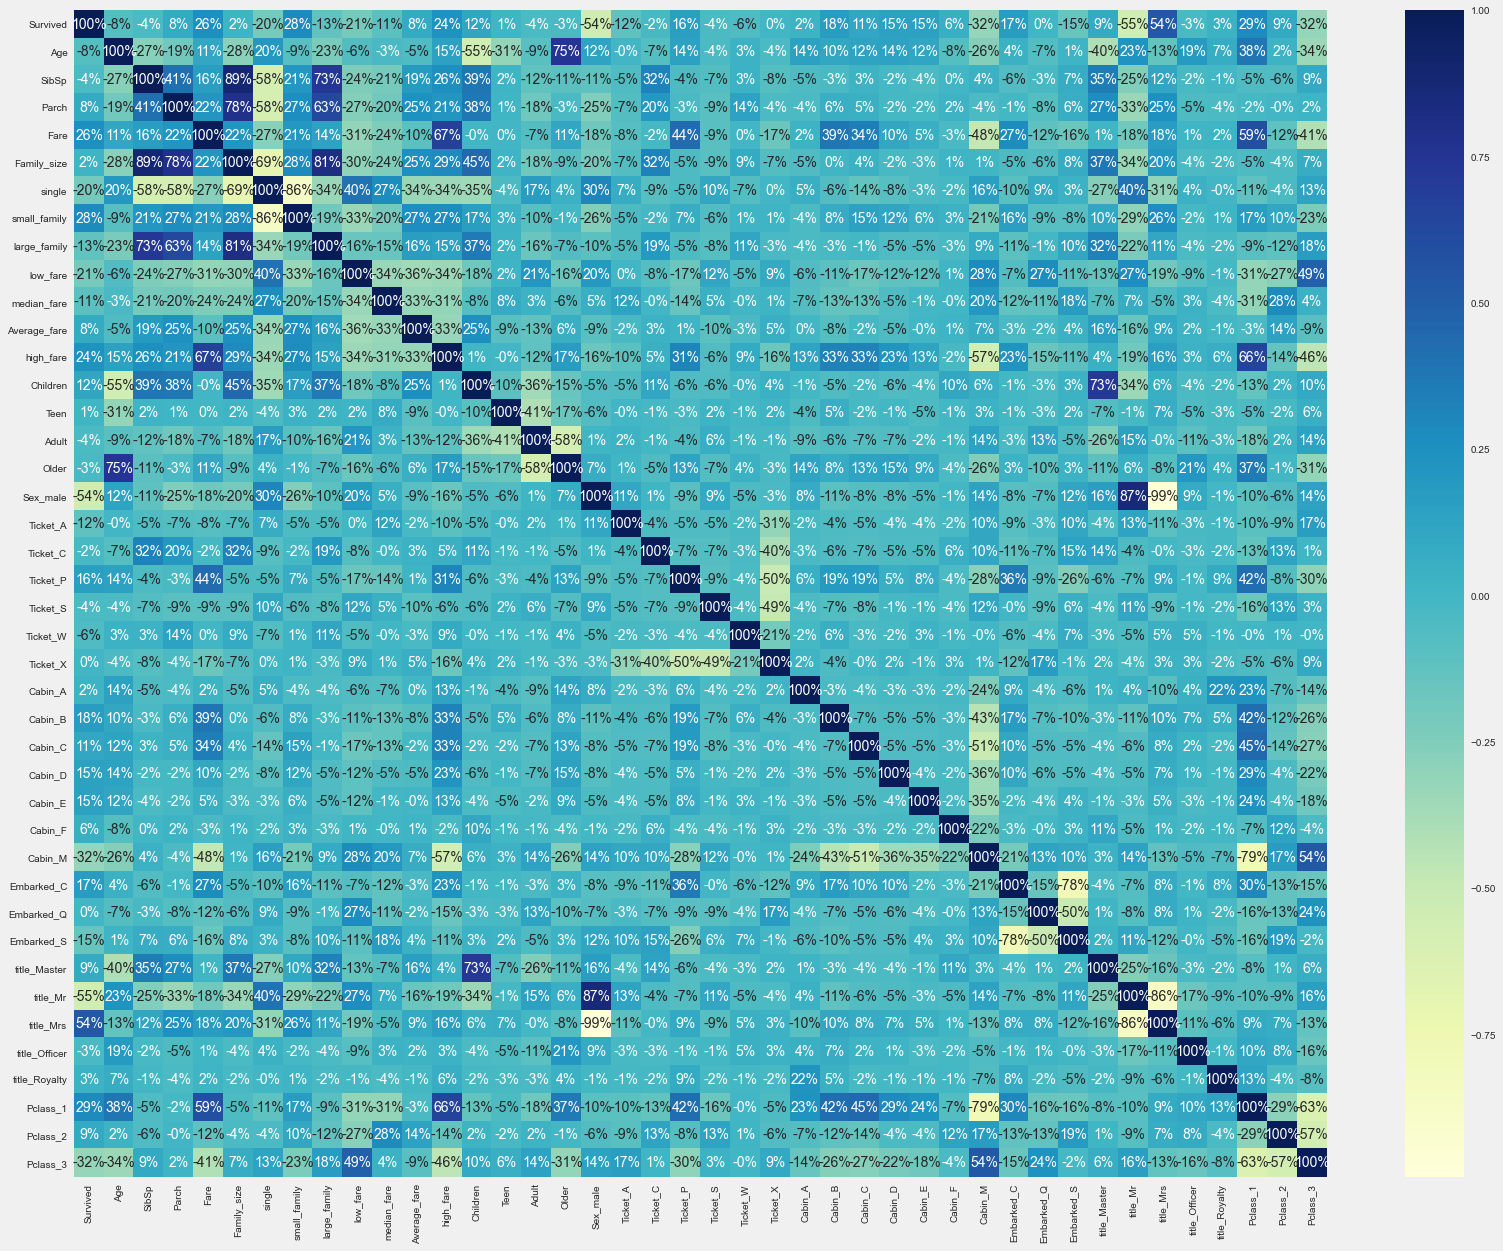

In [91]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),cmap="YlGnBu",fmt=".0%",annot=True)

- high fare & pcalss 1 correlated.
- sex_male and title_mr correlated.

In [92]:
x = df_train.drop(columns=["Survived"])
y = df_train["Survived"]

In [93]:
feature_selec_model = RandomForestClassifier(n_estimators=60, max_features='sqrt')
feature_selec_model.fit(x,y)
print(feature_selec_model.feature_importances_)

[0.16070775 0.0191288  0.01488127 0.1445669  0.02884312 0.00972929
 0.02140415 0.01616868 0.00892085 0.01072409 0.01136896 0.01656603
 0.00927487 0.00911288 0.01578317 0.01385812 0.09287014 0.00450129
 0.00476984 0.00589306 0.00999429 0.00295992 0.01304294 0.00287028
 0.00584886 0.00863464 0.00693358 0.00975667 0.00088795 0.02017528
 0.01036205 0.00749122 0.01478342 0.0065012  0.11281573 0.07637976
 0.00397341 0.00116988 0.01965945 0.01265286 0.03403335]


In [94]:
feature_imp = pd.DataFrame(feature_selec_model.feature_importances_,columns=["importance"])
feature_imp["features"]  = x.columns
feature_imp.set_index("features",inplace=True)
feature_imp.sort_values(by="importance",ascending=True,inplace=True)

<BarContainer object of 41 artists>

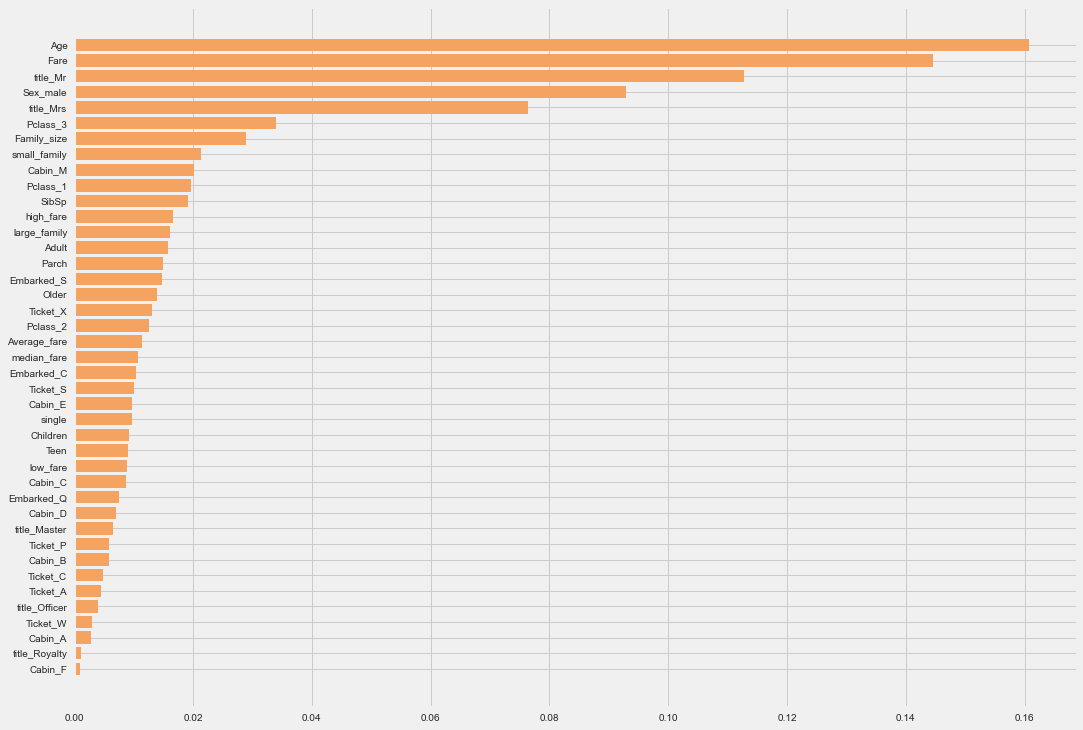

In [95]:
plt.figure(figsize=(16,12))
plt.barh(feature_imp.index,feature_imp["importance"],color="sandybrown")

In [96]:
top_Feature = feature_imp[23:].index
top_Feature

Index(['Ticket_X', 'Older', 'Embarked_S', 'Parch', 'Adult', 'large_family',
       'high_fare', 'SibSp', 'Pclass_1', 'Cabin_M', 'small_family',
       'Family_size', 'Pclass_3', 'title_Mrs', 'Sex_male', 'title_Mr', 'Fare',
       'Age'],
      dtype='object', name='features')

In [97]:
x = df_train[top_Feature]
y = df_train["Survived"]
x

,Ticket_X,Older,Embarked_S,Parch,Adult,large_family,high_fare,SibSp,Pclass_1,Cabin_M,small_family,Family_size,Pclass_3,title_Mrs,Sex_male,title_Mr,Fare,Age
0,0,0,1,0,1,0,0,1,0,1,1,2,1,0,1,1,7.2500,22.000000
1,0,0,0,0,1,0,1,1,1,0,1,2,0,1,0,0,71.2833,38.000000
2,0,0,1,0,1,0,0,0,0,1,0,1,1,1,0,0,7.9250,26.000000
3,1,0,1,0,1,0,1,1,1,0,1,2,0,1,0,0,53.1000,35.000000
4,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,1,8.0500,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,13.0000,27.000000
887,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,30.0000,19.000000
888,0,0,1,2,1,0,0,1,0,1,1,4,1,1,0,0,23.4500,21.646914
889,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,30.0000,26.000000


In [98]:
z = df_test[top_Feature]

## Split data

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)   

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 18)
(179, 18)
(712,)
(179,)


## Model Evaluation

In [101]:
Training_Accuracy_Score = []
Testing_Accuracy_Score =[]
Training_F1_Score = []
Testing_F1_Score = []
Training_Precision =[]
Testing_Precision = []
Training_Recall = []
Testing_Recall = []
Model = []
cros_val_scr = []

In [102]:
def prediction(x_train,x_test,y_train,y_test,model,algo):        
        print(f"Predictions for {algo} Algorithem")
        Model.append(algo)        
        print("Train Results: ")
        print("================")
        pre = model.predict(x_train)
        print("        Training Accuracy Score   : {:.2f} %".format((metrics.accuracy_score(y_train,pre))*100))
        print("")
        print("        Training F1 Score         : {:.4f} ".format((metrics.f1_score(y_train,pre,average="macro"))))
        print("")       
        print("        Training Precision        : {:.4f} ".format((metrics.precision_score(y_train,pre,average="macro"))))
        print("")
        print("        Training Recall           : {:.4f} ".format((metrics.recall_score(y_train,pre,average="macro"))))
        print()
        print(f"       Training Classification Report  :    ")
        print(f" {metrics.classification_report(y_train,pre)}")
        print("")
        print("")
        print("Test Results: ")
        print("================")
        pre_t = model.predict(x_test)
        print("        Testing Accuracy Score    : {:.2f} %".format((metrics.accuracy_score(y_test,pre_t))*100))
        print("")        
        print("        Testing F1 Score          : {:.4f} ".format((metrics.f1_score(y_test,pre_t,average="macro"))))
        print("")        
        print("        Testing Precision         : {:.4f} ".format((metrics.precision_score(y_test,pre_t,average="macro"))))
        print("")
        print("        Testing Recall            : {:.4f} ".format((metrics.recall_score(y_test,pre_t,average="macro"))))
        print()
        print(f"        Testing Classification Report  :  ")
        print(f" {metrics.classification_report(y_test,pre_t)}")        
        Training_Accuracy_Score.append(round((metrics.accuracy_score(y_train,pre)*100),2))
        Testing_Accuracy_Score.append(round((metrics.accuracy_score(y_test,pre_t)*100),2))
        Training_F1_Score.append(round((metrics.f1_score(y_train,pre,average="macro")),3))
        Testing_F1_Score.append(round((metrics.f1_score(y_test,pre_t,average="macro")),3))
        Training_Precision.append(round((metrics.precision_score(y_train,pre,average="macro")),3))
        Testing_Precision.append(round((metrics.precision_score(y_test,pre_t,average="macro")),3))
        Training_Recall.append(round((metrics.recall_score(y_train,pre,average="macro")),3))
        Testing_Recall.append(round((metrics.recall_score(y_test,pre_t,average="macro")),3))


In [103]:
def cvs(x,y,model,algo):
    cv = cross_val_score(model,x,y,cv=5)
    print(f"Cross validation Score for {algo} : {round(cv.mean()*100,2)} %")
    cros_val_scr.append(round((cv.mean()*100),2))

In [104]:
colorm = ["YlOrRd","BuPu","PuBu","YlGn","RdBu"]
import random as ran
def con_mat(x_test,y_test,model,algo):
    print(f"Confusion matrix for {algo} Algorithem")
    pre_t = model.predict(x_test)
    cm_lr = metrics.confusion_matrix(y_test,pre_t)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm_lr,cmap=ran.choice(colorm),annot=True,cbar=True,annot_kws={"size": 20})

## Decision Tree Classifier

In [105]:
dtc = DecisionTreeClassifier(random_state=42)
algo = "Decision Tree Classifier"
model = dtc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Decision Tree Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 99.16 %

        Training F1 Score         : 0.9911 

        Training Precision        : 0.9933 

        Training Recall           : 0.9890 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       439
           1       1.00      0.98      0.99       273

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712



Test Results: 
        Testing Accuracy Score    : 78.21 %

        Testing F1 Score          : 0.7707 

        Testing Precision         : 0.7700 

        Testing Recall            : 0.7714 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       110
           1       0.71      

In [106]:
cvs(x,y,model,algo)

Cross validation Score for Decision Tree Classifier : 77.44 %


Confusion matrix for Decision Tree Classifier Algorithem


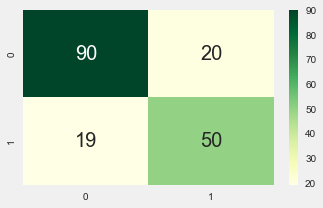

In [107]:
con_mat(x_test,y_test,model,algo)

## Logistic Regression

In [108]:
rbs = RobustScaler()  # Data transformation helps to improve logistic regression accuracy 
x_train_r = rbs.fit_transform(x_train)
y_train_r = y_train
x_test_r = rbs.fit_transform(x_test)
y_test_r = y_test
lg = LogisticRegression()
algo = "Logistic Regression"
model = lg.fit(x_train_r,y_train_r)
prediction(x_train_r,x_test_r,y_train_r,y_test_r,model,algo)

Predictions for Logistic Regression Algorithem
Train Results: 
        Training Accuracy Score   : 83.29 %

        Training F1 Score         : 0.8213 

        Training Precision        : 0.8254 

        Training Recall           : 0.8181 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       439
           1       0.80      0.75      0.78       273

    accuracy                           0.83       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712



Test Results: 
        Testing Accuracy Score    : 81.01 %

        Testing F1 Score          : 0.8016 

        Testing Precision         : 0.7991 

        Testing Recall            : 0.8049 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.74      0.78 

In [109]:
cvs(x,y,model,algo)

Cross validation Score for Logistic Regression : 81.26 %


Confusion matrix for Logistic Regression Algorithem


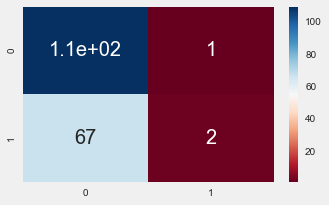

In [110]:
con_mat(x_test,y_test,model,algo)

## Support Vector Classifier

In [111]:
svc = SVC()
algo = "Support Vector Classifier"
model = svc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Support Vector Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 68.26 %

        Training F1 Score         : 0.5930 

        Training Precision        : 0.6996 

        Training Recall           : 0.6062 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.68      0.93      0.78       439
           1       0.72      0.28      0.40       273

    accuracy                           0.68       712
   macro avg       0.70      0.61      0.59       712
weighted avg       0.69      0.68      0.64       712



Test Results: 
        Testing Accuracy Score    : 72.63 %

        Testing F1 Score          : 0.6621 

        Testing Precision         : 0.7600 

        Testing Recall            : 0.6611 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.71      0.95      0.81       110
           1       0.81     

In [112]:
cvs(x,y,model,algo)

Cross validation Score for Support Vector Classifier : 67.46 %


Confusion matrix for Support Vector Classifier Algorithem


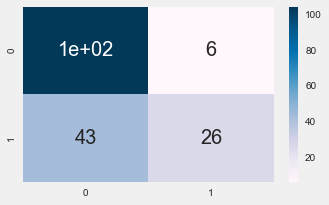

In [113]:
con_mat(x_test,y_test,model,algo)

## KNeighbors Classifier

In [114]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

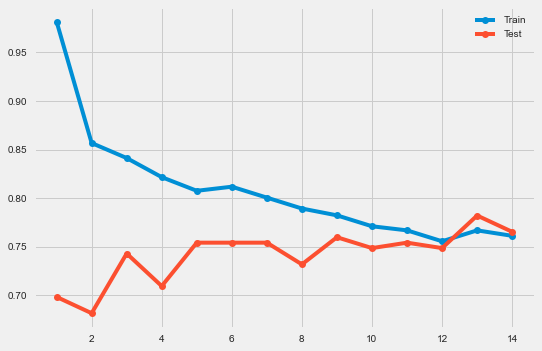

In [115]:
plt.plot(range(1,15),train_scores,label="Train",marker="o")
plt.plot(range(1,15),test_scores,label="Test",marker="o")
plt.legend()

12 Nearest Neighbor give the best training accuracy. 

In [116]:
knn = KNeighborsClassifier(n_neighbors=12)
algo = "K-Nearest Neighbor"
model = knn.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for K-Nearest Neighbor Algorithem
Train Results: 
        Training Accuracy Score   : 75.56 %

        Training F1 Score         : 0.7266 

        Training Precision        : 0.7508 

        Training Recall           : 0.7187 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       439
           1       0.74      0.56      0.64       273

    accuracy                           0.76       712
   macro avg       0.75      0.72      0.73       712
weighted avg       0.75      0.76      0.75       712



Test Results: 
        Testing Accuracy Score    : 74.86 %

        Testing F1 Score          : 0.7191 

        Testing Precision         : 0.7433 

        Testing Recall            : 0.7117 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       110
           1       0.73      0.55  

In [117]:
cvs(x,y,model,algo)

Cross validation Score for K-Nearest Neighbor : 71.5 %


Confusion matrix for K-Nearest Neighbor Algorithem


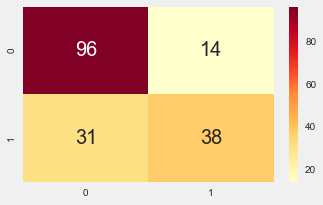

In [118]:
con_mat(x_test,y_test,model,algo)

## Gaussian Naive Bays

In [119]:
gnb = GaussianNB()
algo = "Gaussian Naive Bays"
model = gnb.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Gaussian Naive Bays Algorithem
Train Results: 
        Training Accuracy Score   : 79.07 %

        Training F1 Score         : 0.7817 

        Training Precision        : 0.7789 

        Training Recall           : 0.7860 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       439
           1       0.71      0.77      0.74       273

    accuracy                           0.79       712
   macro avg       0.78      0.79      0.78       712
weighted avg       0.79      0.79      0.79       712



Test Results: 
        Testing Accuracy Score    : 81.56 %

        Testing F1 Score          : 0.8103 

        Testing Precision         : 0.8069 

        Testing Recall            : 0.8203 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       110
           1       0.72      0.84 

In [120]:
cvs(x,y,model,algo)

Cross validation Score for Gaussian Naive Bays : 78.57 %


Confusion matrix for Gaussian Naive Bays Algorithem


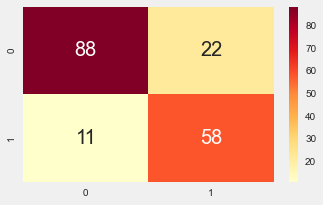

In [121]:
con_mat(x_test,y_test,model,algo)

## Random Forest Classifier

In [122]:
rfc = RandomForestClassifier(random_state=42)
algo = "Random Forest Classifier"
model = rfc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Random Forest Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 99.16 %

        Training F1 Score         : 0.9911 

        Training Precision        : 0.9925 

        Training Recall           : 0.9897 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       439
           1       1.00      0.98      0.99       273

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712



Test Results: 
        Testing Accuracy Score    : 82.68 %

        Testing F1 Score          : 0.8134 

        Testing Precision         : 0.8220 

        Testing Recall            : 0.8078 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      

In [123]:
cvs(x,y,model,algo)

Cross validation Score for Random Forest Classifier : 80.14 %


Confusion matrix for Random Forest Classifier Algorithem


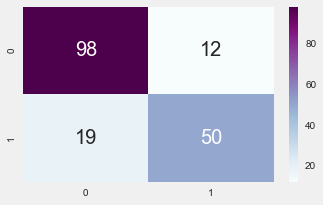

In [124]:
con_mat(x_test,y_test,model,algo)

## Ada Boost Classifier

In [125]:
abc = AdaBoostClassifier(random_state=0)
algo = "Ada Boost Classifier"
model = abc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Ada Boost Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 84.69 %

        Training F1 Score         : 0.8373 

        Training Precision        : 0.8391 

        Training Recall           : 0.8357 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       439
           1       0.81      0.79      0.80       273

    accuracy                           0.85       712
   macro avg       0.84      0.84      0.84       712
weighted avg       0.85      0.85      0.85       712



Test Results: 
        Testing Accuracy Score    : 78.77 %

        Testing F1 Score          : 0.7782 

        Testing Precision         : 0.7760 

        Testing Recall            : 0.7814 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       110
           1       0.71      0.75

In [126]:
cvs(x,y,model,algo)

Cross validation Score for Ada Boost Classifier : 80.14 %


Confusion matrix for Ada Boost Classifier Algorithem


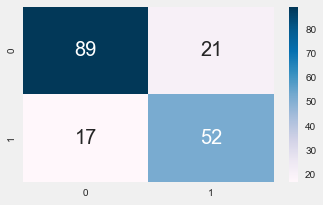

In [127]:
con_mat(x_test,y_test,model,algo)

## Gradient Boosting Classifier

In [128]:
gbc = GradientBoostingClassifier(random_state=42)
algo = "Gradient Boosting Classifier"
model = gbc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Gradient Boosting Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 90.03 %

        Training F1 Score         : 0.8916 

        Training Precision        : 0.9063 

        Training Recall           : 0.8824 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       439
           1       0.92      0.81      0.86       273

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712



Test Results: 
        Testing Accuracy Score    : 83.24 %

        Testing F1 Score          : 0.8163 

        Testing Precision         : 0.8350 

        Testing Recall            : 0.8069 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84  

In [129]:
cvs(x,y,model,algo)

Cross validation Score for Gradient Boosting Classifier : 83.5 %


Confusion matrix for Gradient Boosting Classifier Algorithem


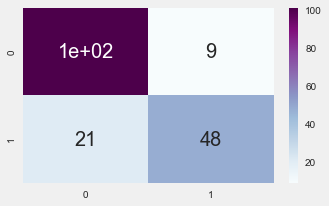

In [130]:
con_mat(x_test,y_test,model,algo)

## Extra Tree Classifier

In [131]:
etc = ExtraTreesClassifier(random_state=42)
algo = "Extra Tree Classifier"
model = etc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for Extra Tree Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 99.16 %

        Training F1 Score         : 0.9911 

        Training Precision        : 0.9933 

        Training Recall           : 0.9890 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       439
           1       1.00      0.98      0.99       273

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712



Test Results: 
        Testing Accuracy Score    : 79.89 %

        Testing F1 Score          : 0.7853 

        Testing Precision         : 0.7892 

        Testing Recall            : 0.7823 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.7

In [132]:
cvs(x,y,model,algo)

Cross validation Score for Extra Tree Classifier : 78.23 %


Confusion matrix for Extra Tree Classifier Algorithem


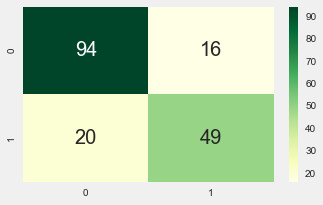

In [133]:
con_mat(x_test,y_test,model,algo)

## Selecting Best Model

In [134]:
results = {"Model":Model,"Training_Accuracy_Score":Training_Accuracy_Score,"Testing_Accuracy_Score":Testing_Accuracy_Score,"Training_F1_Score":Training_F1_Score,
           "Testing_F1_Score":Testing_F1_Score,"Training_Precision":Training_Precision,"Testing_Precision":Testing_Precision,"Training_Recall":Training_Recall,
           "Testing_Recall":Testing_Recall,"cros_val_scr":cros_val_scr}

df = pd.concat([pd.Series(v,name=k) for k,v in results.items()],axis=1)
df.set_index("Model",inplace=True)
df

,Training_Accuracy_Score,Testing_Accuracy_Score,Training_F1_Score,Testing_F1_Score,Training_Precision,Testing_Precision,Training_Recall,Testing_Recall,cros_val_scr
Model,,,,,,,,,
Decision Tree Classifier,99.16,78.21,0.991,0.771,0.993,0.770,0.989,0.771,77.44
Logistic Regression,83.29,81.01,0.821,0.802,0.825,0.799,0.818,0.805,81.26
Support Vector Classifier,68.26,72.63,0.593,0.662,0.700,0.760,0.606,0.661,67.46
K-Nearest Neighbor,75.56,74.86,0.727,0.719,0.751,0.743,0.719,0.712,71.50
Gaussian Naive Bays,79.07,81.56,0.782,0.810,0.779,0.807,0.786,0.820,78.57
Random Forest Classifier,99.16,82.68,0.991,0.813,0.992,0.822,0.990,0.808,80.14
Ada Boost Classifier,84.69,78.77,0.837,0.778,0.839,0.776,0.836,0.781,80.14
Gradient Boosting Classifier,90.03,83.24,0.892,0.816,0.906,0.835,0.882,0.807,83.50
Extra Tree Classifier,99.16,79.89,0.991,0.785,0.993,0.789,0.989,0.782,78.23


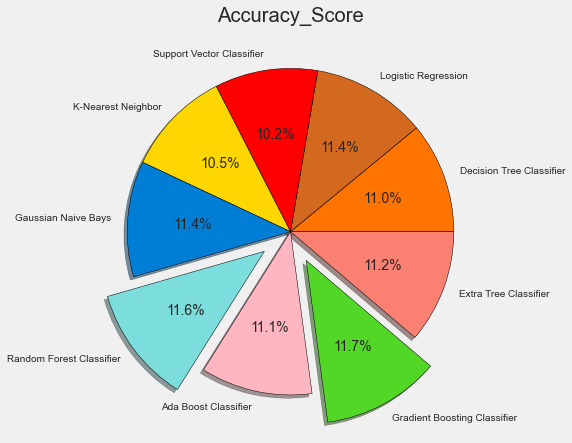

In [135]:
res = []
for i in Testing_Accuracy_Score:
    val = round(i/np.sum(Testing_Accuracy_Score),4)
    res.append(val)

label = [i for i in Model]
color = ["#FF7300","chocolate","#FF0000","gold","#007ED6","#7CDDDD","lightpink","#52D726","salmon"]
plt.figure(figsize=(12,7))
plt.style.use("fivethirtyeight")
explode = [0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.2,0.0]
plt.pie(res,labels=label,autopct="%1.1f%%",explode=explode,colors=color,shadow=True,wedgeprops={"edgecolor":"black"})
plt.title("Accuracy_Score")
plt.show()

- Extra trees classifier,Random Forest,Gradient boosting Models giving the best accuracy score.
- Extra trees classifier Models Mugup training data(Over fitting).So,i select Random Forest and  Gradient boosting models to final prediction.
- Gradient Boosting Model also give the high cross validation score.Testing Precision and F1 score also Good compared to other models.


## Hyper Parameter Tuning 

In [136]:
gbc = GradientBoostingClassifier(random_state=42)
parameters = {'n_estimators':[80,90,100,120],'min_samples_split':[2,3,4],
              'max_depth':[3,5,8,10],"max_features" : ['sqrt', 'log2'],
              'min_samples_leaf': [1,2,3]}
rs = RandomizedSearchCV(gbc,parameters,cv=5,n_jobs=-1)
rs.fit(x_train, y_train)
print ("r2 / variance : ", rs.best_score_)

r2 / variance :  0.8230178272431793


In [137]:
algo = "Gradient Boosting Classifier"
prediction(x_train,x_test,y_train,y_test,rs,algo)

Predictions for Gradient Boosting Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 86.24 %

        Training F1 Score         : 0.8516 

        Training Precision        : 0.8605 

        Training Recall           : 0.8454 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       439
           1       0.85      0.77      0.81       273

    accuracy                           0.86       712
   macro avg       0.86      0.85      0.85       712
weighted avg       0.86      0.86      0.86       712



Test Results: 
        Testing Accuracy Score    : 79.89 %

        Testing F1 Score          : 0.7826 

        Testing Precision         : 0.7920 

        Testing Recall            : 0.7769 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77  

In [138]:
rs.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 3}

In [139]:
gbc = GradientBoostingClassifier(random_state=42)
parameters = {'n_estimators':[60,70,80,90,100,120],'min_samples_split':[2,3,4,5],
              'max_depth':[3,4,5,8],"max_features" : ["sqrt"],
              'min_samples_leaf': [2,3,4,5,6]}
grid = GridSearchCV(gbc,parameters,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
print ("r2 / variance : ", grid.best_score_)

r2 / variance :  0.8272530286614794


In [140]:
algo = "Gradient Boosting Classifier"
prediction(x_train,x_test,y_train,y_test,grid,algo)

Predictions for Gradient Boosting Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 87.08 %

        Training F1 Score         : 0.8604 

        Training Precision        : 0.8705 

        Training Recall           : 0.8537 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       439
           1       0.87      0.78      0.82       273

    accuracy                           0.87       712
   macro avg       0.87      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712



Test Results: 
        Testing Accuracy Score    : 81.01 %

        Testing F1 Score          : 0.7947 

        Testing Precision         : 0.8045 

        Testing Recall            : 0.7887 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79  

In [141]:
rfc = RandomForestClassifier(random_state=42)
parameters = {'n_estimators':[70,80,100,120],'min_samples_split':[2,3,4],
              'max_depth':[25,35,40,45,50],"max_features" : ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [2,3,4],'bootstrap': [True,False]}
rs = RandomizedSearchCV(rfc,parameters,cv=5,n_jobs=-1)
rs.fit(x_train, y_train)
print ("r2 / variance : ", rs.best_score_)
ans = rs.predict(x_train)

r2 / variance :  0.8300305328474342


In [142]:
algo = "Random Forest Classifier"
prediction(x_train,x_test,y_train,y_test,rs,algo)

Predictions for Random Forest Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 87.92 %

        Training F1 Score         : 0.8689 

        Training Precision        : 0.8822 

        Training Recall           : 0.8605 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       439
           1       0.89      0.78      0.83       273

    accuracy                           0.88       712
   macro avg       0.88      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712



Test Results: 
        Testing Accuracy Score    : 84.92 %

        Testing F1 Score          : 0.8341 

        Testing Precision         : 0.8562 

        Testing Recall            : 0.8233 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       110
           1       0.88      

In [143]:
rs.best_params_

{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 45,
 'bootstrap': True}

In [144]:
rfc = RandomForestClassifier(random_state=42)
parameters = {'n_estimators':[90,100,110],'min_samples_split':[2,3,4],
              'max_depth':[32,38,40,44],"max_features" : ['auto'],
              'min_samples_leaf': [3,4,5],'bootstrap': [True]}
gscv = GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
gscv.fit(x_train, y_train)
print ("r2 / variance : ", gscv.best_score_)
ans = gscv.predict(x_train)

r2 / variance :  0.8314586821629074


In [145]:
gscv.best_params_

{'bootstrap': True,
 'max_depth': 32,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 110}

In [146]:
prediction(x_train,x_test,y_train,y_test,rs,algo)

Predictions for Random Forest Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 87.92 %

        Training F1 Score         : 0.8689 

        Training Precision        : 0.8822 

        Training Recall           : 0.8605 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       439
           1       0.89      0.78      0.83       273

    accuracy                           0.88       712
   macro avg       0.88      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712



Test Results: 
        Testing Accuracy Score    : 84.92 %

        Testing F1 Score          : 0.8341 

        Testing Precision         : 0.8562 

        Testing Recall            : 0.8233 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       110
           1       0.88      

Confusion matrix for Random Forest Classifier Algorithem


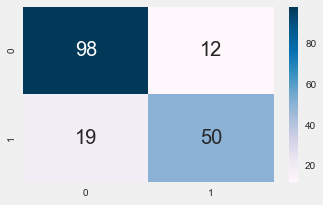

In [147]:
con_mat(x_test,y_test,gscv,algo)

#### Gradient Boosting Model over fit the training set,So i select Random forest classifier  for the final prediction.

In [148]:
ans = rs.predict(z)

In [149]:
submission = pd.DataFrame({
        "PassengerId": passenger,
        "Survived": ans})
submission.set_index("PassengerId",inplace=True)
submission.to_csv(r"E:\final.csv")